In [1]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def generate_random_N_path(N, path_length):
    '''
    Randomize N paths where 1 path is like 00 01 00 01 01 01
    '''
    initial_prob = 0.8
    pusan_prob = 0.2
    one_solution = []
    while len(one_solution) < N:
        one_path_single_digit = random.choices(population=[0, 1], weights=[1-initial_prob, initial_prob], k=path_length)
        one_path_double_digit = ''
        for i in one_path_single_digit:
            if i == 0:
                one_path_double_digit += '00'
            elif i == 1:
                one_path_double_digit += random.choices(population=['10', '01'], weights=[1-pusan_prob, pusan_prob])[0]
        if check_path_integrity(one_path_double_digit):
            one_solution.append(one_path_double_digit)
    return one_solution

In [3]:
def decode_one_path(one_path_double_digit):
    decoded, initial_node, last_visited = [], None, None
    for i in range(len(one_path_double_digit)):
        if i % 2 == 0:
            two_digits = one_path_double_digit[i:i+2]
            if two_digits == '00':
                if last_visited is None:
                    decoded.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                elif last_visited == 'A':
                    decoded.append([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                elif last_visited == 'B':
                    decoded.append([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                elif last_visited == 'C':
                    decoded.append([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
                elif last_visited == 'D':
                    decoded.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
                elif last_visited == 'E':
                    decoded.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
                else: # D
                    print('SOMETHING IS WRONG0!!!')
#           "10" Represent moving forward and if we are at D then Somthing going to go wrong
            elif two_digits == '10':
                if last_visited is None or last_visited == 'A':
                    initial_node = 0
                    last_visited = 'B'
                    decoded.append([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                elif last_visited == 'B':
                    last_visited = 'C'
                    decoded.append([0, 0, 0, 0, 1, 0, 0, 0 , 0, 0, 0, 0, 0])
                elif last_visited == 'C':
                    last_visited = 'D'
                    decoded.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
                elif last_visited == 'D':
                    last_visited = 'E'
                    decoded.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
                else:
                    print('SOMETHING IS WRONG1!!!')
#           "01" Represent moving backward and if we are at A then Somthing going to go wrong
            elif two_digits == '01':
#                 print(last_visited)
                if last_visited is None or last_visited == 'E':
                    initial_node = -1
                    last_visited = 'D'
                    decoded.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
                elif last_visited == 'D':
                    last_visited = 'C'
                    decoded.append([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
                elif last_visited == 'C':
                    last_visited = 'B'
                    decoded.append([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
                elif last_visited == 'B':
                    last_visited = 'A'
                    decoded.append([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
                else:
                    print('SOMETHING IS WRONG2!!!')
      
    decoded = np.array(decoded).T
    decoded_sum = decoded.sum(axis=0)
    if sum(decoded_sum) == 0:
        if random.random() <= pusan_prob:
            decoded[0, :] = 0
        else:
            decoded[0, :] = 1
        return decoded
    k = 0
    while decoded_sum[k] == 0:
        decoded[initial_node, k] = 1
        k += 1
    return decoded

In [4]:
def check_solution_integrity(solution):
    for one_path_double_digit in solution:
        if not check_path_integrity(one_path_double_digit):
            return False
    return True

In [5]:
def check_path_integrity(one_path_double_digit):
    last_visited = None
    for i in range(len(one_path_double_digit)):
        if i % 2 == 0:
            two_digits = one_path_double_digit[i:i+2]
            if two_digits != '00':
                # first time going to AB
                if last_visited is None:
#                     last_visited='A'
                    if two_digits == '10':
                        last_visited = 'B'
                    else:
                        last_visited = 'D'
                # following times
                elif last_visited == 'A':
                    if two_digits == '01':
                        return False
                    else: # '10'
                        last_visited = 'B'
                        
                elif last_visited == 'E':
                    if two_digits == '10':
                        return False
                    else: # '01'
                        last_visited = 'D'
                            
                elif last_visited == 'D':
                    if two_digits == '10':
                        last_visited = 'E'
                    else:
                        last_visited = 'C'
                        
                elif last_visited == 'B':
                    if two_digits == '10':
                        last_visited = 'C'
                    else:
                        last_visited = 'A'
                        
                elif last_visited == 'C':
                    if two_digits == '10':
                        last_visited = 'D'
                    else: 
                        last_visited = 'B'

    return True

In [6]:
def demand_constraint(binary_N_paths, tolerance):
    '''
    make sure the demand is met
    '''

    directional_N_paths = [decode_one_path(one_path) for one_path in binary_N_paths]
    link = sum(directional_N_paths)

    link_AB = link[:4, :]
    link_BC = link[3:7, :]
    link_CD = link[6:10, :]
    link_DE = link[10:, :]

    AB_supply_demand_difference = np.greater_equal(demand_AB - tolerance, link_AB[1:3, :] * D)
    AB_mask = (demand_AB - tolerance) - (link_AB[1:3, :] * D)
    BC_supply_demand_difference = np.greater_equal(demand_BC - tolerance, link_BC[1:3, :] * D)
    BC_mask = (demand_BC - tolerance) - (link_BC[1:3, :] * D)
    CD_supply_demand_difference = np.greater_equal(demand_CD - tolerance, link_CD[1:3, :] * D)
    CD_mask = (demand_CD - tolerance) - (link_CD[1:3, :] * D)
    DE_supply_demand_difference = np.greater_equal(demand_DE - tolerance, link_DE[1:3, :] * D)
    DE_mask = (demand_DE - tolerance) - (link_DE[1:3, :] * D)
    
    missedDemandNumAB = np.sum(AB_supply_demand_difference * AB_mask)

    missedDemandNumBC = np.sum(BC_supply_demand_difference * BC_mask)

    missedDemandNumCD = np.sum(CD_supply_demand_difference * CD_mask)
    
    missedDemandNumDE = np.sum(DE_supply_demand_difference * DE_mask)

    return int(missedDemandNumAB + missedDemandNumBC + missedDemandNumCD + missedDemandNumDE) == 0, int(missedDemandNumAB + missedDemandNumBC + missedDemandNumCD + missedDemandNumDE)

In [7]:
def rush_hour_constraint(binary_N_paths):
    '''
    during rush hours, one interval is not enough time to commute
    '''
    violationCount = 0
    for one_path_double_digit in binary_N_paths:
        one_path_single_digit_list = []
        one_path_double_digit_list = list(one_path_double_digit)
        for i in range(len(one_path_double_digit_list)):
            if i % 2 == 0:
                one_path_single_digit_list.append(int(one_path_double_digit_list[i]) + int(one_path_double_digit_list[i+1]))
        # morning rush hour
        if one_path_single_digit_list[1] + one_path_single_digit_list[2] == 2:
            violationCount += 1
        # evening rush hour
        if one_path_single_digit_list[6] + one_path_single_digit_list[7] == 2:
            violationCount += 1
    return int(violationCount) == 0, int(violationCount)

In [8]:
def max_working_hour_constraint(binary_N_paths):
    '''
    make sure that no driver works more than a few hours continuously
    '''
    violationCount = 0
    for one_path_double_digit in binary_N_paths:
        one_path_single_digit_list = []
        one_path_double_digit_list = list(one_path_double_digit)
        for i in range(len(one_path_double_digit_list)):
            if i % 2 == 0:
                one_path_single_digit_list.append(int(one_path_double_digit_list[i]) + int(one_path_double_digit_list[i+1]))
        num, num_list = 0, []
        one_path_copy = one_path_single_digit_list.copy()
        # first check if rush hour 10 actually is 11.
        if checkRushHourFlag:
            if one_path_copy[1] == 1 and one_path_copy[2] == 0:
                one_path_copy[2] = 1
            if one_path_copy[6] == 1 and one_path_copy[7] == 0:
                one_path_copy[7] = 1
        for i, node in enumerate(one_path_copy):
            num += node
            if i+1 == len(one_path_copy):
                num_list.append(num)
                continue
            if node == 1 and one_path_copy[i+1] == 0:
                num_list.append(num)
                num = 0
        violationCount += sum(np.array(num_list) > maxWorkingHour / intervalDuration)
    return int(violationCount) == 0, int(violationCount)

In [9]:
def check_feasibility(binary_N_paths, checkDemand=True, checkRushHour=False, checkMaxWorkingHour=False):
    '''
    s.t. constraints (make sure initial paths & crossover paths & mutated paths are feasible)
    constraint1: meet demand
    constraint2: during rush hours, one interval is not enough time to commute (optional)
    constraint3: make sure that no driver works more than a few hours continuously
    '''

    demandFlag, rushHour, maxWorkingHour = True, True, True
    if checkDemand:
        demandFlag, demandViolationNum = demand_constraint(binary_N_paths, tolerance)
    if checkRushHour:
        rushHour, rushHourViolationNum = rush_hour_constraint(binary_N_paths)
    if checkMaxWorkingHour:
        maxWorkingHour, maxWorkingHourViolationNum = max_working_hour_constraint(binary_N_paths)
    if not demandFlag:
        print("d"+str(demandViolationNum), end="")
    if not rushHour:
        print("r"+str(rushHourViolationNum), end="")
    if not maxWorkingHour:
        print("w"+str(maxWorkingHourViolationNum), end="")
    return demandFlag and rushHour and maxWorkingHour

In [10]:
def fitness(binary_N_paths, addPenalty=False):
    """
    objective function ish -> natural selection to pick the good ones
    the lower the better!!
    """
    total_cost = 0
    # basic cost
    for one_path_double_digit in binary_N_paths:
        one_path_single_digit_list = []
        one_path_double_digit_list = list(one_path_double_digit)

        for i in range(len(one_path_double_digit_list)):
            if i % 2 == 0:
                one_path_single_digit_list.append(int(one_path_double_digit_list[i]) + int(one_path_double_digit_list[i+1]))
        one_path_single_digit_np = np.array(one_path_single_digit_list)
        target_indices = np.where(one_path_single_digit_np == 1)[0]
        if len(target_indices) == 0:
            duration_interval_num = 0
        else:
            duration_interval_num = int(target_indices[-1] - target_indices[0] + 1)
        if duration_interval_num == 0:
            total_cost += 0
        elif duration_interval_num * intervalDuration <= 5:
            total_cost += 90
        elif duration_interval_num * intervalDuration <= 7.5:
            total_cost += 180
        else:
            total_cost += (20 * intervalDuration) * duration_interval_num
    # add penalty
    if addPenalty:
        demandFlag, demandViolationNum = demand_constraint(binary_N_paths, tolerance)
        rushHour, rushHourViolatonNum = rush_hour_constraint(binary_N_paths)
        maxWorkingHour, maxWorkingHourViolationNum = max_working_hour_constraint(binary_N_paths)
        if checkDemandFlag:
            total_cost += alpha * demandViolationNum * demandViolationPenalty
        if checkRushHourFlag:
            total_cost += rushHourViolatonNum * rushHourViolationPenalty
        if maxWorkingHourViolationPenalty:
            total_cost += maxWorkingHourViolationNum * maxWorkingHourViolationPenalty
    return total_cost


In [11]:
def generate_population(population_size):

    population, fitness_scores_add_penalty = [], []
    for _ in range(population_size):
        binary_N_paths = generate_random_N_path(N, intervalNum)
        population.append(binary_N_paths)
        fitness_score_add_penalty = fitness(binary_N_paths, addPenalty=True)
        fitness_scores_add_penalty.append(fitness_score_add_penalty)
    return np.array(population), np.array(fitness_scores_add_penalty)

In [12]:
def elitism(population, fitness_scores, elitism_cutoff=2):
    elite_indices = np.argpartition(np.array(fitness_scores), elitism_cutoff)[:elitism_cutoff]
    return population[elite_indices, :]

In [13]:
def single_point_crossover(parent1, parent2):
    """
    Randomly pick the good ones and cross them over
    """

    assert parent1.size == parent2.size
    length = len(parent1)
    if length < 2:
        return parent1, parent2
    count = 0
    while count <= loop_limit:
        cut = random.randint(1, length - 1) * 2
        kid1 = np.array(list(parent1)[:cut] + list(parent2)[cut:])
        kid2 = np.array(list(parent2)[:cut] + list(parent1)[cut:])
        if check_solution_integrity(kid1) and check_solution_integrity(kid2):
            return kid1, kid2
        elif check_solution_integrity(kid1) and not check_solution_integrity(kid2):
            return kid1, None
        elif not check_solution_integrity(kid1) and check_solution_integrity(kid2):
            return None, kid2
        count += 1
    return parent1, parent2

In [14]:
def single_mutation(binary_N_paths):
    """
    Mutate only one node in one path for now
    """

    count = 0
    binary_N_paths_copy = binary_N_paths.copy()
    while count <= loop_limit:
        mutate_path = np.random.randint(0, N)
        mutate_index = np.random.randint(0, intervalNum) * 2
        print(mutate_path, " , ",mutate_index)
        double_digits_to_mutate = binary_N_paths_copy[mutate_path][mutate_index:mutate_index+2]
        pool = ['00', '01', '10']
        pool.remove(double_digits_to_mutate)
        mutated_double_digits = random.choices(population=pool)[0]
        original_string = binary_N_paths_copy[mutate_path]
        mutated_string = original_string[:mutate_index] + mutated_double_digits + original_string[mutate_index+2:]
        if check_path_integrity(mutated_string):
            binary_N_paths_copy[mutate_path] = mutated_string
            return binary_N_paths_copy
        count += 1
    return binary_N_paths

In [15]:
def create_next_generation(population, population_fitnesses_add_penalty, population_size, elitism_cutoff):
    """
    Randomly pick the good ones and cross them over
    """
    children = []
    while True:
        parents = random.choices(
            population=population,
            weights=[(max(population_fitnesses_add_penalty) - score + 1)/(max(population_fitnesses_add_penalty) * len(population_fitnesses_add_penalty) - sum(population_fitnesses_add_penalty) + len(population_fitnesses_add_penalty)) for score in population_fitnesses_add_penalty],
            k=2
        )
        kid1, kid2 = single_point_crossover(parents[0], parents[1])

        for _ in range(mutation_num):
            kid1 = single_mutation(kid1)
        children.append(kid1)
        if len(children) == population_size - elitism_cutoff:
            return np.array(children)
        for _ in range(mutation_num):
            kid2 = single_mutation(kid2)
        children.append(kid2)
        if len(children) == population_size - elitism_cutoff:
            return np.array(children)

In [16]:
# create_next_generation(pop, fit, 800, 2)

Step 1
Step 1.1

Initialization Done! Time: 52.267318s
Step 1.2
Initial Min Cost: 22391.0 -> 7580.0
Step 2
----------------------------- generation 1 Start! -----------------------------
Elites selected!
1  ,  12
5  ,  60
9  ,  58
7  ,  20
19  ,  66
20  ,  40
7  ,  66
22  ,  46
5  ,  58
16  ,  58
14  ,  50
17  ,  54
0  ,  50
10  ,  8
12  ,  12
17  ,  18
7  ,  22
10  ,  62
10  ,  2
3  ,  0
22  ,  36
Children created!
Min Cost: 22389.0 -> 7680.0
d702r27w12
All constraints met? False
best solution (path):
 ['10000100001010001000010101100001001001100100101010011010010001100100'
 '10011001001001100001101000101000010101000110101001100110011001101001'
 '10100100001001011000001001101001001001101001010100001001101010010010'
 '10100110100101100000000110001001011001001001101001100100100010011001'
 '10100110100101011010000010011001010100100100101001000010100001000110'
 '10101001100000001000000000010110010100010010101001001010010000100101'
 '001010100110011000010100011000101001001000010001011001100

d629r27w12
All constraints met? False
best solution (path):
 ['10000100001010001000010101100001001001100100101010011010010001100100'
 '10011001001001100001101000101000010101000110101001100110011001101001'
 '10100100001001011000001001101001001001101001010100001001101010010010'
 '10100110100101100000000110001001011001001001101001100100100010011001'
 '10100110100101011010000010011001010100100100101001000010100001000110'
 '10101001100000001000000000010110010100010010101001001010010000100101'
 '00101010011001100001010001100010100100100001000101100110011000001010'
 '10100110101001011010000001100000011001010001010010010010100110100110'
 '10101001011001100110000000101000011001100100011010011001001001000100'
 '00101010000100100110010010010100100101000000100010100001000101101010'
 '10010010100000010010100110011010010110000010010101001001001001100010'
 '00100010101001000001100110000001010110100101100110001001011010010010'
 '00001010010010000100011001001010000000010100101001011000000100001001'
 '1

Min Cost: 19649.0 -> 7730.0
d564r27w12
All constraints met? False
best solution (path):
 ['10000100001010001000010101100001001001100100101010011010010001100100'
 '10011001001001100001101000101000010101000100101001100110011001101001'
 '10100100001001011000001001101001001001101001010100001001101010010010'
 '10100110100101100000000110001001011001001001100101100100100010011001'
 '10100110100101011010000010011001010100100100101001000010100001000110'
 '10101001100000001000000000010110010100010010101001001010010000100101'
 '00101010011001100001010001100010100100100001000101100110011000001010'
 '10100110101001011010000001100000011001010001010010010010100110100110'
 '10101001011001100110000000101000011001100100011010011001001001000100'
 '00101010000100100110010010010100100101000000100010100001000101101010'
 '10010010100000010010100110011010010110000010010101001001001001100010'
 '00100010101001000001100110000001010110100101100110001001011010010010'
 '000010100100100001000110010010100000000101001

Min Cost: 19109.0 -> 7730.0
d537r27w12
All constraints met? False
best solution (path):
 ['10000100001010001000010101100001001001100100101010011010010001100100'
 '10011001001001100001101000101000010101000100101001100110011001101001'
 '10100100001001010000001001101001001001101001010100001001101010010010'
 '10100110100101100000000110001001011001001001100101100100100010011001'
 '10100110100101011010000010011001010100100100101001000010100001000110'
 '10101001100000001000000000010110010100010010101001001010010000100101'
 '00101010011001100001010001100010100100100001000101100110011000001010'
 '10100110101001011010000001100000011001010001010010010010100110100110'
 '10101001011001100110000000101000011001100100011010011001001001000100'
 '00101010000100100110010010010100100101000000100010100001000101101010'
 '10010010100000010010100110011010010110000010010101001001001001100010'
 '00100010101001000001100110000001010110100101100110001001011010010010'
 '000010100100100001000110010010100000000101001

Min Cost: 17419.0 -> 7720.0
d453r27w12
All constraints met? False
best solution (path):
 ['10000100001010001000010101100001001001100100101010011001010001100100'
 '10011001001001100001101000101000010101000100101001100110011001101001'
 '10100100001001011000001001101001001001101001010100001001101010010010'
 '10100110100101100000000110001001011001001001100101100100100110011001'
 '10100110100101011010000010011001010100100100101001000010100001000110'
 '10101001100000001000000000010110010100010010101001001010010000100101'
 '00101010011001100001010001100010100100100001000101100110011000000110'
 '10100110101001011010000001100000011001010001010010010010100110100110'
 '10101001011001100110000000101000011001100100011010011001000001000100'
 '00101010000100100110010010010100100101000000100010100001000101101010'
 '10010010100000010010100110011010010110000010010101001001001001100010'
 '00100010101001000001100110000001010110100101100110001001011010010010'
 '000010100100100001000110010010100000000101001

9  ,  26
9  ,  38
8  ,  30
2  ,  58
8  ,  32
13  ,  32
16  ,  18
11  ,  28
6  ,  58
4  ,  58
6  ,  34
Children created!
Min Cost: 17039.0 -> 7710.0
d434r27w12
All constraints met? False
best solution (path):
 ['10000100001010001000010101100001001001100100101010011001010001100100'
 '10011001001001100001101000101000010101000100101001100110011001101001'
 '10100100001001011000001001101001000001101001010100001001101010010010'
 '10100110100101100000000110001001011001001001100101100100100110011001'
 '10100110100101011010000010011001010100100100101001000010100001000110'
 '10101001100000001000000000010110010100010010101001001010010000100101'
 '00101010011001100001010001100010100100100001000101100110011000000110'
 '10100110101001011010000001100000011001010001010010010010100110100110'
 '10101001011001100110000000101000011001100100011010011001000001000100'
 '00101010000100100110010010010100100101000000100010100001000100101010'
 '10010010100000010010100110011010010110000010010101001001001001100010'

d418r27w11
All constraints met? False
best solution (path):
 ['10000100001010001000010101100001001001100100101010011001010001100100'
 '10011001001001100001101000101000010101000100101001100110011001101001'
 '10100100001001011000001001101001000001101001010100001001101010010010'
 '10100110100101100000000110001001011001001001100101100100100110011001'
 '10100110100101011010000010011001010100100100101001000010100001000110'
 '10101001100000001000000000010110010100010010101001001010010000100101'
 '00101010011001100001010001100010100100100001000101100110011000000110'
 '10100110101001011010000001100000011001010001010010010010100110100110'
 '10101001011001100110000000100000011001100100011010011001000001000100'
 '00101010000100100110010010010100100101000000100010100001000100101010'
 '10010010100000010010100100011010010110000010010101001001001001100010'
 '00100010101001000001100110000001010110100101100110001001011010010010'
 '00001010010010001000011001001010000000010100101001011000000100001001'
 '1

11  ,  48
8  ,  12
18  ,  20
19  ,  48
9  ,  22
16  ,  20
1  ,  18
5  ,  58
18  ,  66
8  ,  2
8  ,  54
17  ,  24
4  ,  0
8  ,  58
Children created!
Min Cost: 15944.0 -> 7700.0
d380r27w11
All constraints met? False
best solution (path):
 ['10000100001010001000010101100001001001100100101010011001010001100100'
 '10011001001001100001101000101000010101000100101001100110011001101001'
 '10100100001001011000001001101001000001101001010100001001101010010010'
 '10100110100101100000000110001001011001001001100101100100100110011001'
 '10100110100101011010000010011001010100100100101001000010100001000110'
 '10101001100000001000000000010110010100010010101001001010010000100101'
 '00101010011001100001010001100010100100100001000101100110011000000110'
 '10100110101001011010000001100000011001010001010010010010100110100110'
 '10101001011001100110000000100000011001100100011010011010000001000100'
 '00101010000100100110010010010100100101000000100010100101000100101010'
 '10010010100000010010100100011010010110000

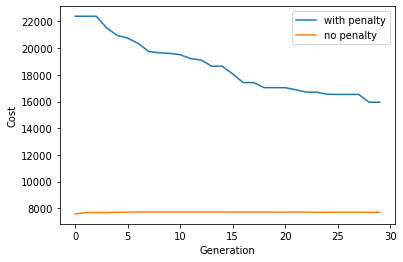

best solution (path):
 ['10000100001010001000010101100001001001100100101010011001010001100100'
 '10011001001001100001101000101000010101000100101001100110011001101001'
 '10100100001001011000001001101001000001101001010100001001101010010010'
 '10100110100101100000000110001001011001001001100101100100100110011001'
 '10100110100101011010000010011001010100100100101001000010100001000110'
 '10101001100000001000000000010110010100010010101001001010010000100101'
 '00101010011001100001010001100010100100100001000101100110011000000110'
 '10100110101001011010000001100000011001010001010010010010100110100110'
 '10101001011001100110000000100000011001100100011010011010000001000100'
 '00101010000100100110010010010100100101000000100010100101000100101010'
 '10010010100000010010100100011010010110000010010101001001001001100010'
 '00100010101001000001100110000001010110100101100110001001011010010010'
 '00001010010010001000011001001010000000010100101001011000000100001001'
 '101000100100100101100101101001011000101

In [17]:
def result_stats(progress_with_penalty, progress):
    """
    print important stats & visulize progress_with_penalty
    """
    print('**************************************************************')
    print(f"Progress_with_penalty of improvement: {progress_with_penalty[0]} to {progress_with_penalty[-1]}" )
    print(f"Progress of improvement: {progress[0]} to {progress[-1]}")
    print("Improvement Rate of progress:", abs(progress[-1] - progress[0])/progress[0])
    print('**************************************************************')
    plt.plot(progress_with_penalty, data=progress_with_penalty, label='with penalty')
    plt.plot(progress, data=progress, label='no penalty')
    plt.xlabel("Generation")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

def run_evolution(population_size, evolution_depth, elitism_cutoff):
    '''
    Main function of Genetic Algorithm
    '''
    tic = time.time()
    print("Step 1")
    # first initialize a population 
    population, population_fitnesses_add_penalty = generate_population(population_size)
    print("Step 1.1")
    initialization_end = time.time()
    print(f'\nInitialization Done! Time: {initialization_end - tic:.6f}s')
    print("Step 1.2")
    population_fitnesses = [fitness(binary_N_paths) for binary_N_paths in population]
    print(f'Initial Min Cost: {min(population_fitnesses_add_penalty)} -> {min(population_fitnesses)}')
    # keep track of improvement
    
    progress_with_penalty, progress = [], []

    # start evolving :)
    print("Step 2")
    for i in range(evolution_depth):
        progress_with_penalty.append(min(population_fitnesses_add_penalty))
        progress.append(min(population_fitnesses))
        print(f'----------------------------- generation {i + 1} Start! -----------------------------')
        elitism_begin = time.time()
        elites = elitism(population, population_fitnesses_add_penalty, elitism_cutoff)
        print('Elites selected!')
        children = create_next_generation(population, population_fitnesses_add_penalty, population_size, elitism_cutoff)
        print('Children created!')
        population = np.concatenate([elites, children])
        population_fitnesses_add_penalty = [fitness(binary_N_paths, addPenalty=True) for binary_N_paths in population]
        population_fitnesses = [fitness(binary_N_paths) for binary_N_paths in population]
        
        evol_end = time.time()
        print(f"Min Cost: {min(population_fitnesses_add_penalty)} -> {min(population_fitnesses)}")
        # check best solution feasibility
        minIndex = population_fitnesses_add_penalty.index(min(population_fitnesses_add_penalty))
        best_solution = population[minIndex]
        allFeasibilityFlag = check_feasibility(best_solution, checkRushHour=checkRushHourFlag, checkMaxWorkingHour=checkMaxWorkingHourFlag)
        print("\nAll constraints met?", allFeasibilityFlag)

        # print best solution
        print('best solution (path):\n', best_solution)
        directional_N_paths = [decode_one_path(one_path) for one_path in population[minIndex]]
        link = sum(directional_N_paths)
        print('best solution (link): \n', link)

        print(f'---------------------- generation {i + 1} evolved! Time: {evol_end - elitism_begin:.4f}s ----------------------\n')
    print("Step 3")
    # plot results
    result_stats(progress_with_penalty, progress)


    minIndex = population_fitnesses_add_penalty.index(min(population_fitnesses_add_penalty))
    best_solution = population[minIndex]
    print('best solution (path):\n', best_solution)

    # check if all constraints are met (ideally True)
    print("\nAll constraints met?", check_feasibility(best_solution, checkDemand=checkDemandFlag, checkRushHour=checkRushHourFlag, checkMaxWorkingHour=checkMaxWorkingHourFlag))
    directional_N_paths = [decode_one_path(one_path) for one_path in population[minIndex]]
    link = sum(directional_N_paths)
    print('best solution (link): \n', link)

if __name__ == "__main__":

    """initialization for genetic algo"""
    initial_prob = 0.8
    pusan_prob = 0.2
    population_size = 10
    elitism_cutoff = 2
    mutation_num = 1
    loop_limit = 100
    evolution_depth = 30

    """initialization for buses"""
    # # of buses
    N = 23
    # #seats on each bus
    D = 30
    tolerance = 0
    intervalDuration = 0.5
    # numerical example
    demand = np.array([
        [114,106,132,132,117,83,57,52,13,8,18,13,26,3,13,10,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0], 
        [0,0,0,0,0,0,14,2,0,7,12,7,9,5,7,7,12,9,32,39,53,35,30,18,60,44,60,53,90,58,78,71,35,55]
    ])
    demand_AB = demand
    demand_AB = demand_AB.astype(int)
    demand_BC = np.around(demand / 9)
    demand_BC = demand_BC.astype(int)
    demand_CD = np.around(demand / 3)
    demand_CD = demand_CD.astype(int)
    demand_DE = np.around(demand / 5)
    demand_DE = demand_DE.astype(int)

    intervalNum = demand.shape[-1]
    maxWorkingHour = 4
    checkDemandFlag, checkRushHourFlag, checkMaxWorkingHourFlag = True, True, True
    alpha, demandViolationPenalty, rushHourViolationPenalty, maxWorkingHourViolationPenalty = 1, 20, 17, 15

    # run main function
    run_evolution(population_size, evolution_depth, elitism_cutoff)

    